In [11]:
import pandas as pd
df = pd.read_csv('reddit_dataset.csv')
print(df.head())
print("Total posts:", len(df))



   Unnamed: 0                                               text  \
0           0  Welcome to /r/depression's check-in post - a p...   
1           1  We understand that most people who reply immed...   
2           2  Anyone else just miss physical touch? I crave ...   
3           3  I’m just so ashamed. Everyone and everything f...   
4           4  I really need a friend. I don't even have a si...   

                                               title  target  
0  Regular check-in post, with information about ...       1  
1  Our most-broken and least-understood rules is ...       1  
2  I haven’t been touched, or even hugged, in so ...       1  
3                    Being Depressed is Embarrassing       1  
4  I'm desperate for a friend and to feel loved b...       1  
Total posts: 5957


In [7]:
df.columns = ['id', 'text', 'title', 'target']

print("Column Names:")
print(df.columns)
print("\nFirst 5 Rows:")
print(df.head())

Column Names:
Index(['id', 'text', 'title', 'target'], dtype='object')

First 5 Rows:
   id                                               text  \
0   1  We understand that most people who reply immed...   
1   2  Anyone else just miss physical touch? I crave ...   
2   3  I’m just so ashamed. Everyone and everything f...   
3   4  I really need a friend. I don't even have a si...   
4   5  Hear me out... life in general sucks. We have ...   

                                               title  target  
0  Our most-broken and least-understood rules is ...       1  
1  I haven’t been touched, or even hugged, in so ...       1  
2                    Being Depressed is Embarrassing       1  
3  I'm desperate for a friend and to feel loved b...       1  
4  Call me crazy but suicide seems rational at th...       1  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/iker/nltk_data...


T-statistic: -17.343, P-value: 0.000


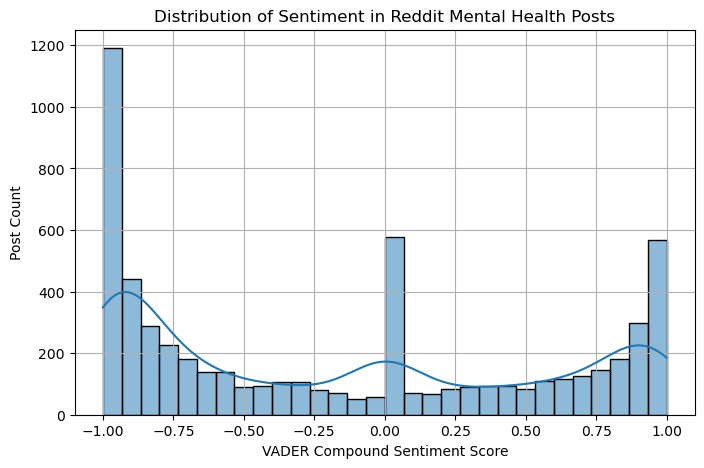

In [8]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('reddit_dataset.csv', header=None)
df.columns = ['id', 'text', 'title', 'target']
df['text'] = df['text'].astype(str)

# Run VADER sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# One-sample t-test: is average sentiment ≠ 0?
t_stat, p_val = ttest_1samp(df['sentiment'].dropna(), 0)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment in Reddit Mental Health Posts')
plt.xlabel('VADER Compound Sentiment Score')
plt.ylabel('Post Count')
plt.grid(True)
plt.show()



Pre vs Post COVID Sentiment T-test:
T-statistic: 0.836, P-value: 0.403


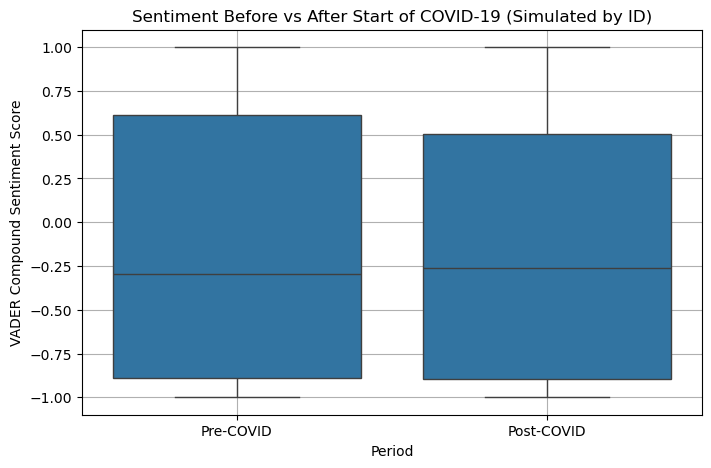

In [10]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Step 1: Simulate pre-COVID and post-COVID groups based on ID split
midpoint = len(df) // 2
pre_covid = df.iloc[:midpoint]['sentiment']
post_covid = df.iloc[midpoint:]['sentiment']

# Step 2: Perform independent t-test
t_stat2, p_val2 = ttest_ind(pre_covid.dropna(), post_covid.dropna())
print(f"Pre vs Post COVID Sentiment T-test:\nT-statistic: {t_stat2:.3f}, P-value: {p_val2:.3f}")

# Create boxplot for visual comparison
df['period'] = ['Pre-COVID' if i < midpoint else 'Post-COVID' for i in range(len(df))]

plt.figure(figsize=(8, 5))
sns.boxplot(x='period', y='sentiment', data=df)
plt.title('Sentiment Before vs After Start of COVID-19 (Simulated by ID)')
plt.ylabel('VADER Compound Sentiment Score')
plt.xlabel('Period')
plt.grid(True)
plt.show()


In [17]:
import statsmodels.api as sm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Drop missing values for safety
df = df.dropna(subset=['text', 'title'])

# Convert all entries to strings
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

# Now safely apply len()
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)


# Create features for regression
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len) 



nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Ensure 'text' column is string
df['text'] = df['text'].astype(str)

# Apply VADER sentiment scoring
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

X = df[['text_length', 'title_length']]
X = sm.add_constant(X)
y = df['sentiment']

model = sm.OLS(y, X).fit()
print(model.summary())




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/iker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.127
Date:                Tue, 20 May 2025   Prob (F-statistic):            0.00220
Time:                        01:32:41   Log-Likelihood:                -6301.2
No. Observations:                5607   AIC:                         1.261e+04
Df Residuals:                    5604   BIC:                         1.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1606      0.019     -8.627   

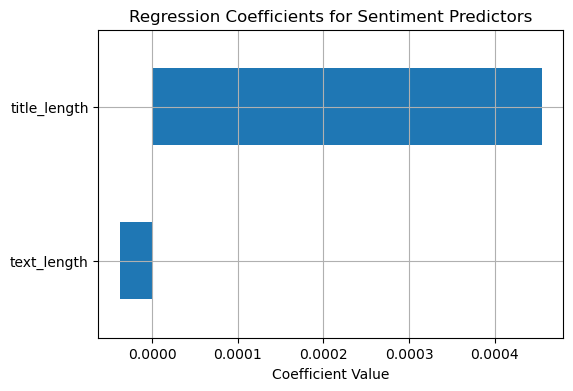

In [18]:
# Plot coefficient estimates (excluding constant)
coef = model.params[1:]  # exclude intercept
plt.figure(figsize=(6, 4))
coef.plot(kind='barh')
plt.title('Regression Coefficients for Sentiment Predictors')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.show()

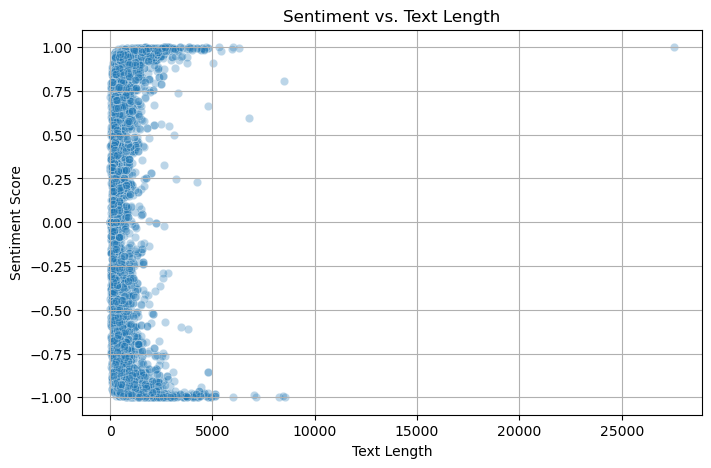

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='text_length', y='sentiment', data=df, alpha=0.3)
plt.title('Sentiment vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

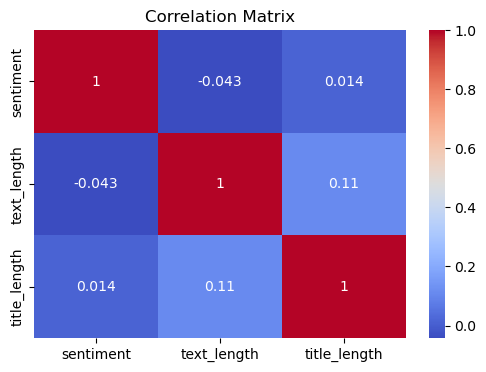

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['sentiment', 'text_length', 'title_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
summary_stats = df[['sentiment', 'text_length', 'title_length']].describe()
print(summary_stats)

         sentiment   text_length  title_length
count  5607.000000   5607.000000   5607.000000
mean     -0.172894    836.218477     42.372392
std       0.745315    883.835749     31.046616
min      -0.999600      1.000000      1.000000
25%      -0.909300    311.000000     22.000000
50%      -0.389400    599.000000     35.000000
75%       0.618050   1070.000000     53.000000
max       0.999500  27542.000000    300.000000
